In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
# Read in source data and clean: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
df = pd.read_csv('vg-data.zip')
df.columns = df.columns.str.lower()

# Clean numerical features
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
df = df.dropna()

# Clean categorical features
df['year_of_release'] = df['year_of_release'].astype(int)
categorical_features = df.dtypes[df.dtypes == 'object'].index
df[categorical_features] = df[categorical_features].apply(lambda x: x.str.lower().str.replace(" ", "_"))

df.head(10)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,wii_sports,wii,2006,sports,nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,nintendo,e
2,mario_kart_wii,wii,2008,racing,nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,nintendo,e
3,wii_sports_resort,wii,2009,sports,nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,nintendo,e
6,new_super_mario_bros.,ds,2006,platform,nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,nintendo,e
7,wii_play,wii,2006,misc,nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,nintendo,e
8,new_super_mario_bros._wii,wii,2009,platform,nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,nintendo,e
11,mario_kart_ds,ds,2005,racing,nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,nintendo,e
13,wii_fit,wii,2007,sports,nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,nintendo,e
14,kinect_adventures!,x360,2010,misc,microsoft_game_studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,good_science_studio,e
15,wii_fit_plus,wii,2009,sports,nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0,nintendo,e


<AxesSubplot:xlabel='critic_score', ylabel='Count'>

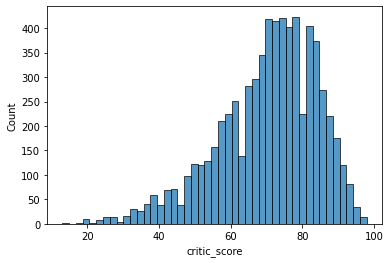

In [11]:
sns.histplot(df['critic_score'])

<AxesSubplot:xlabel='user_score', ylabel='Count'>

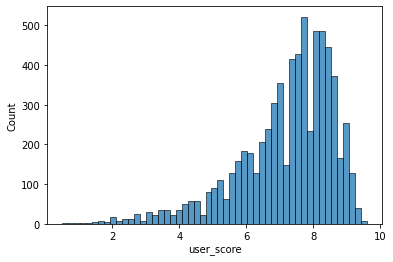

In [22]:
sns.histplot(df['user_score'])

<AxesSubplot:xlabel='year_of_release', ylabel='Count'>

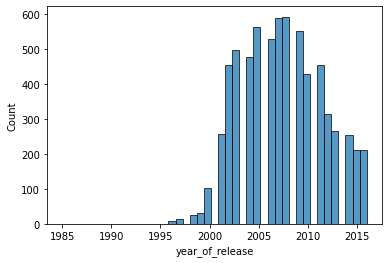

In [23]:
sns.histplot(df['year_of_release'])

<AxesSubplot:xlabel='global_sales', ylabel='Count'>

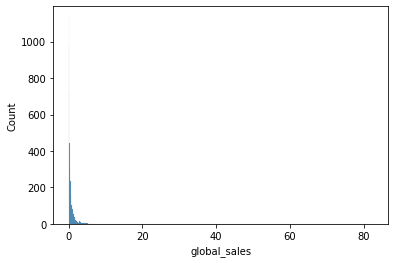

In [24]:
sns.histplot(df.global_sales)

<AxesSubplot:ylabel='Count'>

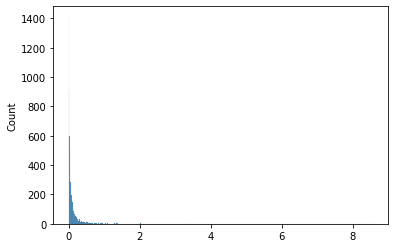

In [26]:
df['age'] = (2021 - 5) - df['year_of_release']
sns.histplot((df['global_sales'] / df['age']))

In [21]:
df.global_sales.describe()

count    6825.000000
mean        0.777590
std         1.963443
min         0.010000
25%         0.110000
50%         0.290000
75%         0.750000
max        82.530000
Name: global_sales, dtype: float64